# 第一章 统计学习及监督学习概论
## 例1.1 多项式函数拟合问题
### 问题描述
假设给定一个训练数据集：
$$
T=\{(x_1,y_1),(x_2,y_2), \cdots,(x_N,y_N)\}
$$
其中 $x_i \in R$是输入$x$的观测值，$y_i\in R$是相应的输出$y$的观测指， $i=1,2, \cdots, N$
多项式函数拟合的任务是**假设给定数据由M次多项式函数给出，选择最优可能产生这些数据的M次多项式函数**。
设$M$次多项式为:
$$
f_M(x, w)=w_0 + w_1x + w_2x^2+\cdots+w_Mx^M=\sum_{j=0}^M w_jx^j
$$
### 解决思路
1. **首先确定模型的复杂度，即确定多项式的次数**
2. 然后在给定的模型复杂度下，按**经验风险最小化的策略**，求解参数，即多项式的系数$w_i$。具体，求以下经验风险最小化：
$$
L(w)=\frac{1}{2}\sum_{i=1}^N(f(x_i, w)-y_i)^2
$$
其中，损失函数式平方损失，系数$\frac{1}{2}$是为了计算方便
3. 将模型与训练数据代入最小经验风险中得
$$
L(w)=\frac{1}{2}\sum_{i=1}^N (\sum_{j=0}^M w_jx_i^j - y_i)^2
$$
4. 使用**最小二乘法**求拟合多项式系数得唯一解，记作$(w_0^*,w_1^*,\cdots, w_M^*)$,使得经验风险最小。即$\min L(w)$

In [146]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

In [147]:
"""
最小二乘法，使用scipy.optimize.leastsq(func, x0, args=(), ... )函数实现
我们一般只需要指定前3个参数
(1) func: 计算误差的函数
(2) x0 : 初始的参数值
(3) args: 指定func的其他参数
scipy.optime.leastsq 返回值的第1项是 计算的参数
ref：https://github.com/wzyonggege/statistical-learning-method/blob/master/LeastSquaresMethod/least_sqaure_method.ipynb
"""

def ObjectiveFunc(X):
    """
    目标函数，这里使用的是sin(2Πx)
    :param X: 输入变量
    :return: 目标函数值，真实值
    """
    return np.sin(2 * np.pi * X)
def FittedFunc(W, X):
    """
    用于拟合的多项式函数
    :param W: 多项式函数的参数向量W
    :param X: 输入
    :return: 当前多项式函数的输出的值，预测值
    """
    # np.poly1d([1, 2, 3])生成一个形如 f=1x^2 + 2x + 3 的多项式函数
    f = np.poly1d(W)
    return f(X)

def EmpiricalRiskFunc(W, X, Y):
    """
    计算最小经验风险值
    :param X: 输入
    :param W: 用于拟合的多项式参数
    :param Y: 真实值 或 目标值
    :return:
    """
    # 计算预测值
    yHat = FittedFunc(W, X)
    # 计算误差的平方
    loss = (Y - yHat) ** 2
    # 与书中的一致（书中提到系数设为0.5是为了计算方便）
    return loss * 0.5

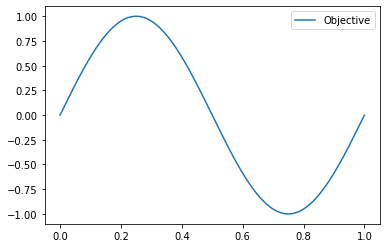

In [148]:
# 计算并绘制目标函数
obj_input = np.linspace(0, 1, 1000)
obj_output = ObjectiveFunc(obj_input)

plt.plot(obj_input, obj_output, label='Objective')
plt.legend()

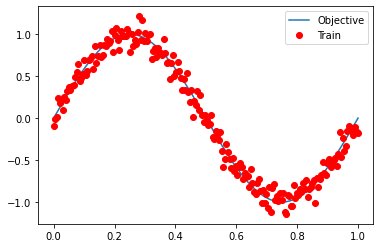

In [184]:
# 制作训练数据
train_input = np.linspace(0, 1, 200)
# 添加噪声，噪声服从正态分布 N(0, 0.1)
train_output = np.array([np.random.normal(0, 0.1) + out for out in ObjectiveFunc(train_input)])
plt.plot(obj_input, obj_output, label='Objective')
plt.plot(train_input, train_output, 'ro',  label='Train')
plt.legend()

In [185]:
def Fitting(M=0, funcs=None):
    # 随机生成初始化参数w
    InitialWeight = np.random.rand(M + 1)
    # 应用最小二乘法
    leastw = leastsq(func=funcs, x0=InitialWeight, args=(train_input, train_output))
    # 返回计算的权重
    return leastw

In [186]:
# scipy.optime.leastsq 返回值的第1项是 计算的参数
w_0 = Fitting(M=0, funcs=EmpiricalRiskFunc)[0]
w_1 = Fitting(M=1, funcs=EmpiricalRiskFunc)[0]
w_3 = Fitting(M=3, funcs=EmpiricalRiskFunc)[0]
w_9 = Fitting(M=9, funcs=EmpiricalRiskFunc)[0]

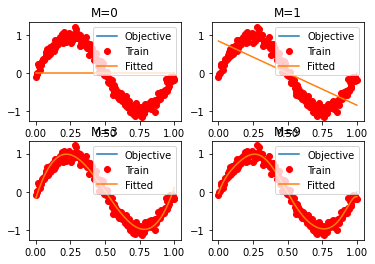

In [187]:
# 绘制图像
def shows(*args):
    plt.subplot(221)
    plt.plot(obj_input, obj_output, label='Objective')
    plt.plot(train_input, train_output, 'ro',  label='Train')
    plt.plot(train_input, FittedFunc(W=args[0], X=train_input), label="Fitted")
    plt.title('M=' + str(args[0].size - 1))
    plt.legend()

    plt.subplot(222)
    plt.plot(obj_input, obj_output, label='Objective')
    plt.plot(train_input, train_output, 'ro',  label='Train')
    plt.plot(train_input, FittedFunc(W=args[1], X=train_input), label="Fitted")
    plt.title('M=' + str(args[1].size - 1))
    plt.legend()

    plt.subplot(223)
    plt.plot(obj_input, obj_output, label='Objective')
    plt.plot(train_input, train_output, 'ro',  label='Train')
    plt.plot(train_input, FittedFunc(W=args[2], X=train_input), label="Fitted")
    plt.title('M=' + str(args[2].size - 1))
    plt.legend()

    plt.subplot(224)
    plt.plot(obj_input, obj_output, label='Objective')
    plt.plot(train_input, train_output, 'ro',  label='Train')
    plt.plot(train_input, FittedFunc(W=args[3], X=train_input), label="Fitted")
    plt.title('M=' + str(args[3].size - 1))
    plt.legend()

shows(w_0, w_1, w_3, w_9)

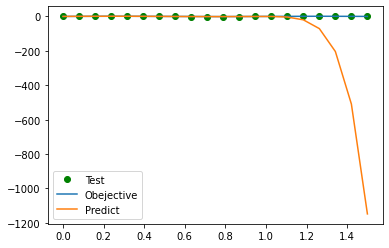

In [188]:
# 进行预测
def test(weight):
    test_input = np.linspace(0, 1.5, 20)
    test_output = [np.random.normal(0, 0.1) + out for out in ObjectiveFunc(test_input)]
    # 使用w=9时计算的参数进行预测
    predict = FittedFunc(W=weight, X=test_input)
    # 绘制图像
    plt.plot(test_input, test_output, 'go' ,label="Test")
    plt.plot(np.linspace(0, 1.5, 1000), ObjectiveFunc(np.linspace(0, 1.5, 1000)), label='Obejective')
    plt.plot(test_input, predict, label='Predict')
    plt.legend()
test(w_9)

### 结果
在[0, 1]范围内进行训练，效果比较好不错。
当在[1, 1.5]范围内进行测试时，只有一小部分是拟合的，后面的差距都很大。

### 正则化防止过拟合现象
因为，之前使用的损失函数是平方损失，所以加入的正则化项是参数向量的L2范数
$$
L(w)=\frac{1}{2}\sum_{i=1}^N(f(x_i, w)-y_i)^2 + \frac{\lambda}{2}||w||^2
$$

In [189]:
def StructuralRishFunc(W, X, Y):
    lam = 2
    yHat = FittedFunc(W, X)
    # 计算误差的平方
    loss = 0.5 * (Y - yHat) ** 2 + (lam / 2)
    loss = np.append(loss, np.linalg.norm(x=W, ord=2))
    # 与书中的一致（书中提到系数设为0.5是为了计算方便）
    return loss

In [194]:
w_norm_0 = Fitting(M=0, funcs=StructuralRishFunc)[0]
w_norm_1 = Fitting(M=20, funcs=StructuralRishFunc)[0]
w_norm_3 = Fitting(M=100, funcs=StructuralRishFunc)[0]
w_norm_9 = Fitting(M=150, funcs=StructuralRishFunc)[0]

E:\Application\Anconda\envs\pytorch_11_3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 4400.
  warnings.warn(errors[info][0], RuntimeWarning)
E:\Application\Anconda\envs\pytorch_11_3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 20400.
  warnings.warn(errors[info][0], RuntimeWarning)
E:\Application\Anconda\envs\pytorch_11_3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 30400.
  warnings.warn(errors[info][0], RuntimeWarning)


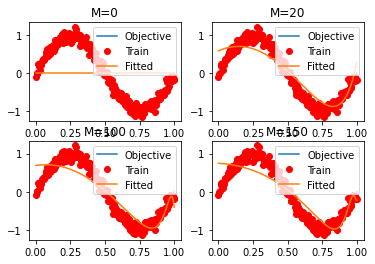

In [195]:
shows(w_norm_0, w_norm_1, w_norm_3, w_norm_9)

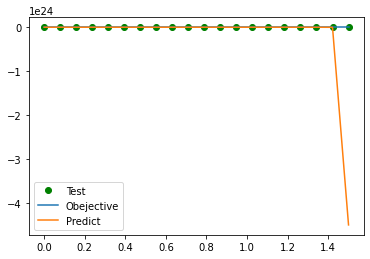

In [196]:
test(w_norm_9)

这个测试的结果要好一些，但仍有问题。可能的原因在于数据不够多。
训练都是在[0, 1]范围内训练的，测试是在[1, 1.5]范围内测试的。

## 习题
### 1.1 说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型n次独立的数据生成结果，其中k次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率.
#### (1) 伯努利模型的极大似然估计
- 模型： 伯努利模型（条件概率分布）
- 策略：经验风险最小化
- 算法：极大似然估计（MLE）
随机变量$X$服从**伯努利模型**，即
$$
P(X=x;\theta=\{p\})=p^x(1-p)^{1-x}
$$
假设观测值为$(x_1,x_2,\cdots,x_n)$，其中$\forall i,  x_i=\{0, 1\}$, n个观测值中有$k$个观测值为1,其余$n-k$个观测值为0，所以有
$$
\sum_{i=1}^n x_i = k
$$
1. *写出似然函数*
$$
\begin{aligned}
P(\theta) & =\mathop {argmax}\limits_\theta P(x_1,x_2, \cdots, x_n ; \theta)\\
&=\mathop {argmax}\limits_\theta \prod\limits_{i=1}^n P(x_i;\theta)\\
&=\mathop {argmax}\limits_\theta \prod\limits_{i=1}^n \theta^{x_i}(1-\theta)^{(1-x_i)}
\end{aligned}
$$
2. *对似然函数求对数*
$$
\begin{aligned}
L(\theta) &= \sum_{i=1}^n(x_i\log\theta + (1-x_i)\log(1-\theta))\\
&=\log\theta\sum_{i=1}^n x_i + \log(1-\theta)\sum_{i=1}^n(1-x_i)\\
&= k \log\theta + (n - k)\log(1-\theta)
\end{aligned}
$$
3. *对参数$\theta$求导数*
$$
\frac{d L}{d\theta}=\frac{k}{\theta}+\frac{n-k}{\theta-1}=\frac{n\theta - k}{\theta(\theta-1)}
$$
4. *解似然方程：当一阶导数为0时，达到最大值，此时的参数就是目标参数*
$$
\theta = \frac{k}{n}
$$
#### （2）伯努利模型的贝叶斯估计
- 模型：伯努利模型
- 策略：经验风险最小化
- 算法：最大后验估计（MAP）

贝叶斯估计：利用样本信息+先验信息，贝叶斯估计是最大后验估计的进一步扩展，贝叶斯估计同样假定$\theta$是一个随机变量，但贝叶斯估计并不是直接估计出$\theta$的某个特定值，而是估计$\theta$的分布，这是贝叶斯估计与最大后验概率估计不同的地方。
1. 确定参数的似然函数
2. 确定参数的先验分布，应是后验分布的共轭先验
3. 确定参数的后验分布函数
4. 根据贝叶斯公式求解参数的后验分布

最大后验概率估计与贝叶斯估计都需要用到先验概率，两者的区别在于：最大后验概率分布认为 $\theta$是一个随机变量，即 $\theta$ 具有某种概率分布，称为先验分布，求解时除了要考虑似然函数 $P(X|\theta)$外，还要考虑$\theta$的先验分布$P(\theta)$。因此最大化的函数是$P(X|\theta) * P(\theta) $ 。
1. 确定参数的先验分布以及似然函数
- **假设参数$\theta$服从参数为$a,b$的beta分布，即$\theta \sim beta(a,b)$**,beta分布的概率密度函数如下:
$$
f(x;a, b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1}
$$
- **样本的似然函数如下**
$$
\begin{aligned}
P(x_1,x_2, \cdots,x_n | \theta) &= \prod\limits_{i=1}^n P(x_i;\theta)\\
&= \theta^{\sum_{i=1}^n x_i}(1-p)^{\sum_{i=1}^n (1-x_i)}\\
&= \theta^k(1-\theta)^{(n-k)}
\end{aligned}
$$
2. 确定参数的后验分布函数
$$
\begin{aligned}
\hat \theta &= \mathop {argmax} P(x_1,x_2, \cdots,x_n | \theta) P(\theta)\\
&= \theta^k(1-\theta)^{(n-k)} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1} \\
&=\theta^{k+a-1}(1-\theta)^{(n-k+b-1)} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}
\end{aligned}
$$
3. 将后验分布函数转换为对数函数
$$
L(\hat \theta)=(a+k-1)\log\theta + (b +n-k -1)\log(1-\theta)
$$
4. 求对数函数的最大值（求导，解方程)
$$
\begin{aligned}
\frac{d L}{d\hat\theta}&=\frac{a+k-1}{\theta}+\frac{b+n-k-1}{\theta-1}\\
&=\frac{(a+b+n-2)\theta-(a+k-1)}{\theta(\theta-1)}
\end{aligned}
$$
当$L'(\hat\theta) = 0$时，取得最大值
$$
\hat\theta  = \frac{a+k-1}{a+b+n-2}
$$

### 1.2 通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。
经验风险最小化
$$
ERM = \mathop {argmin}\limits_{f \in F} \frac{1}{N}\sum_{i=1}^N L(y_i,f(i))
$$
当损失函数变为**对数损失函数**时，即$L(y_i,f(i))=-logP(y_i|x_i)$
$$
\begin{aligned}
ERM &= \mathop {argmin}\limits_{f \in F} \frac{1}{N}\sum_{i=1}^N -logP(y_i|x_i)\\
&=\mathop {armax}\limits_{f \in F} \frac{1}{N}\sum_{i=1}^N logP(y_i|x_i)
\end{aligned}
$$
极大似然估计：
$$
\begin{aligned}
P(x) &= \mathop {argmax}\limits_{x}P(Y|X)\\
&= \mathop {argmax}\limits_{x} \prod\limits_{i=1}^NP(y_i|x_i)
\end{aligned}\\
取对数\\
L(x)=\mathop {argmax}\limits_{x} \sum_{i=1}^N \log P(y_i|x_i)
$$
其中，系数$\frac{1}{N}$是常数，对估计结果没有影响，可以忽略。此时**经验风险最小化等价于极大似然估计**。